In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
mpl = matplotlib
import pandas as pd
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker

In [2]:
sns.set(style='ticks',font='Helvetica',font_scale=1.2)
d = {'ls': ['-',':', '',''],
     'marker':['o','^','o','+'],
#      'mfc':['','','gold','tab:red'],
#      'mec':['','','gold','tab:red'],
#      'fillstyle':['none','none','full',"full"],
#      'lw':[2,2,2,8],
#      'mew':[1,1,1,2],
#      'ms':[6,6,4,10],
    }
cm = plt.cm.get_cmap('tab10')
markers = ['o', '^', 's', 'X', 'D']
mpl.rcParams['text.usetex'] = True

In [19]:
df = pd.read_csv("WFC.csv")
df

,lambda,Send,Scale,F1,Purity,Running Time (s),eq,eq2
0,0.01,626,579,0.809896,0.946921,6942.925428,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
1,0.02,315,292,0.804494,0.989143,3436.843726,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
2,0.04,159,148,0.804494,0.989143,1768.117123,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
3,0.05,127,119,0.804494,0.989143,1447.908046,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
4,0.06,107,100,0.782570,0.966000,1216.651589,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
5,0.10,65,61,0.795522,0.881046,768.390465,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
6,0.50,15,15,0.365678,0.342796,176.778948,$sim^s_{min} = (1+\lambda)^s sim_{min}$,WFC
7,0.01,25,25,0.787957,0.880561,308.474453,$sim^s_{min} = (1+\lambda)^{s^2} sim_{min}$,Hyperexponential
8,0.02,17,17,0.091024,0.049400,231.265477,$sim^s_{min} = (1+\lambda)^{s^2} sim_{min}$,Hyperexponential
9,0.04,12,12,0.091024,0.049400,156.722413,$sim^s_{min} = (1+\lambda)^{s^2} sim_{min}$,Hyperexponential


In [20]:
df_F1 = df[['lambda','F1', 'eq']].pivot(index='lambda', columns='eq')
df_F1
df2 = df[['lambda','F1', 'Purity', 'eq2']].pivot(index='lambda', columns='eq2')
df2

F1                     Purity          
eq2    Hyperexponential       WFC Hyperexponential       WFC
lambda                                                      
0.01           0.787957  0.809896         0.880561  0.946921
0.02           0.091024  0.804494         0.049400  0.989143
0.04           0.091024  0.804494         0.049400  0.989143
0.05           0.091024  0.804494         0.049400  0.989143
0.06           0.091024  0.782570         0.049400  0.966000
0.10           0.091024  0.795522         0.049400  0.881046
0.50           0.091024  0.365678         0.049400  0.342796

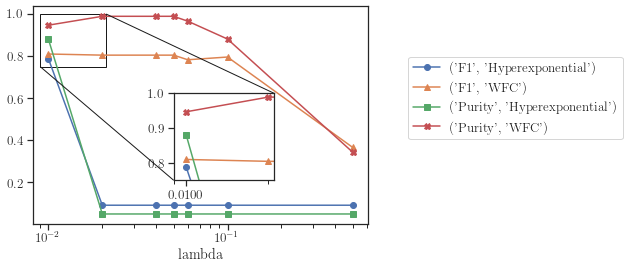

In [29]:
ax = plot(df2)
plt.savefig("test.png", bbox_inches = 'tight', dpi=400)
plt.show()

In [26]:
def plot(df):
    ax = df.plot(kind='line', logx=True)
    for i, line in enumerate(ax.get_lines()):
        line.set_marker(markers[i])
 
        # adding legend
        ax.legend(ax.get_lines(), df.columns, bbox_to_anchor=(1.1, 0.8))
        
    axins = inset_axes(ax, width="30%", height="40%", loc='lower left',
                   bbox_to_anchor=(0.4, 0.17, 1, 1),
                   bbox_transform=ax.transAxes)
    df.plot(ax=axins, kind='line', logx=True, legend=False, xlabel='')
    axins.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axins.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    for i, line in enumerate(axins.get_lines()):
        line.set_marker(markers[i])
    axins.set_xlim(0.009, 0.021)
    axins.set_ylim(0.75, 1.0)
    mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='k', lw=1)
    axins.patch.set_alpha(0.5)
#     plt.show()
    return ax

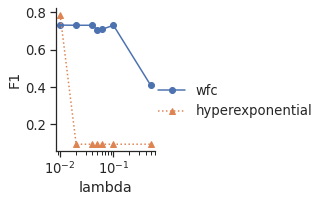

In [6]:
g = sns.FacetGrid(data=df, hue='eq2', hue_kws=d, margin_titles=False)
g.map(plt.plot, 'lambda', 'F1')
axes = g.axes
axes[0][0].set_xscale('log')

g.add_legend(title="",
#              loc=1,
#              bbox_to_anchor=(0.57,1.05),
#              bbox_to_anchor=(0.71,1.05),
#              ncol=2,
#              frameon=True,
             )

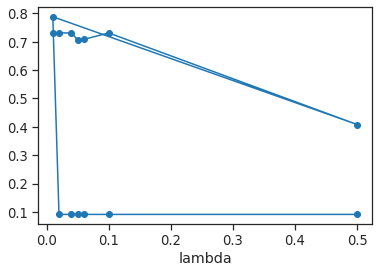

In [9]:
ax = df.plot(x="lambda", y="F1", legend=False, c=cm(0), marker=markers[0])


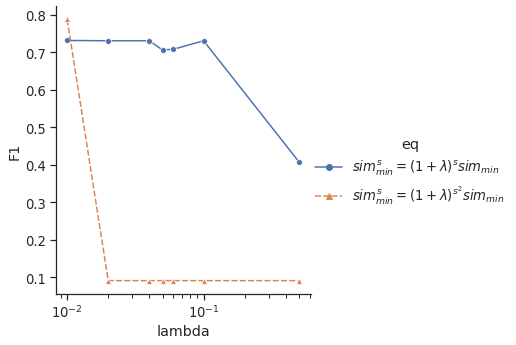

In [47]:
g = sns.relplot(data=df, x='lambda', y='F1', hue='eq', kind="line", markers=['o','^'], style='eq')
axes = g.axes
axes[0][0].set_xscale('log')

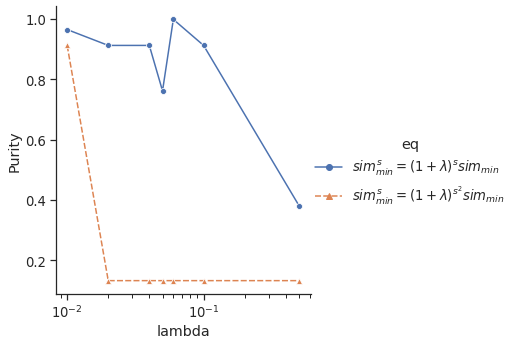

In [49]:
g = sns.relplot(data=df, x='lambda', y='Purity', hue='eq', kind="line", markers=['o','^'], style='eq')
axes = g.axes
axes[0][0].set_xscale('log')

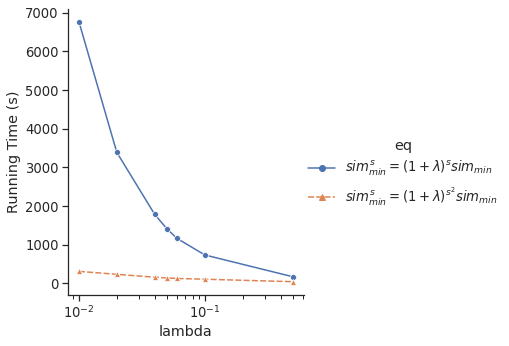

In [50]:
g = sns.relplot(data=df, x='lambda', y='Running Time (s)', hue='eq', kind="line", markers=['o','^'], style='eq')
axes = g.axes
axes[0][0].set_xscale('log')